In [7]:
import pandas as pd

LB_PER_KG = 2.20462

def state_names_to_abbr(df, state_header):
    us_state_abbreviations = {
        "Alabama": "AL",
        "Alaska": "AK",
        "Arizona": "AZ",
        "Arkansas": "AR",
        "California": "CA",
        "Colorado": "CO",
        "Connecticut": "CT",
        "Delaware": "DE",
        "District of Columbia": "DC",
        "Florida": "FL",
        "Georgia": "GA",
        "Hawaii": "HI",
        "Idaho": "ID",
        "Illinois": "IL",
        "Indiana": "IN",
        "Iowa": "IA",
        "Kansas": "KS",
        "Kentucky": "KY",
        "Louisiana": "LA",
        "Maine": "ME",
        "Maryland": "MD",
        "Massachusetts": "MA",
        "Michigan": "MI",
        "Minnesota": "MN",
        "Mississippi": "MS",
        "Missouri": "MO",
        "Montana": "MT",
        "Nebraska": "NE",
        "Nevada": "NV",
        "New Hampshire": "NH",
        "New Jersey": "NJ",
        "New Mexico": "NM",
        "New York": "NY",
        "North Carolina": "NC",
        "North Dakota": "ND",
        "Ohio": "OH",
        "Oklahoma": "OK",
        "Oregon": "OR",
        "Pennsylvania": "PA",
        "Rhode Island": "RI",
        "South Carolina": "SC",
        "South Dakota": "SD",
        "Tennessee": "TN",
        "Texas": "TX",
        "Utah": "UT",
        "Vermont": "VT",
        "Virginia": "VA",
        "Washington": "WA",
        "West Virginia": "WV",
        "Wisconsin": "WI",
        "Wyoming": "WY",
    }

    # Replace state names with abbreviations using the dictionary
    df[state_header] = df[state_header].map(us_state_abbreviations)

    return df


def read_state_emissions_data():
    """
    Reads in grid emission intensities by state from EIA

    Returns
    -------
    data_df (pd.DataFrame): A pandas dataframe containing the 2022 emission intensity data (lb CO2 / MWh)

    """

    # Read in the data associated with each eGrids subregion
    dataPath = f"data/emissions_region2022.xlsx"
    data = pd.ExcelFile(dataPath)
    data_df = pd.read_excel(data, "State", skiprows=[0])

    # Select the columns of interest
    data_df = data_df.filter(
        [
            "Year",
            "Census Division and State",
            "Kilograms of CO2 per Megawatthour of Generation",
        ],
        axis=1,
    )

    # Rename the long columns
    data_df = data_df.rename(
        columns={
            "Census Division and State": "STUSPS",
            "Kilograms of CO2 per Megawatthour of Generation": "CO2_rate",
        }
    )

    # Convert the CO2 rate from kg / MWh to lb / MWh
    data_df["CO2_rate"] = data_df["CO2_rate"] * LB_PER_KG

    # Select rows corresponding to year 2022
    data_df = data_df[data_df["Year"] == 2022]

    # Update the state name to its associated abbreviation
    data_df = state_names_to_abbr(data_df, "STUSPS")

    # Remove NaN rows that aren't associated with states
    data_df = data_df.dropna()

    return data_df

# Read in the state-level CO2 intensity from EIA
emissions_data = read_state_emissions_data()

print("Tabulated emissions data by state: \n")
print(emissions_data)

Tabulated emissions data by state: 

    Year STUSPS     CO2_rate
1   2022     CT   550.822102
2   2022     ME   482.190077
3   2022     MA   953.983166
4   2022     NH   298.792149
5   2022     RI   831.423931
6   2022     VT    12.872776
8   2022     NJ   538.489458
9   2022     NY   542.206447
10  2022     PA   714.612141
12  2022     IL   640.305424
13  2022     IN  1584.857226
14  2022     MI  1097.832417
15  2022     OH  1164.074634
16  2022     WI  1187.108504
18  2022     IA   790.309973
19  2022     KS   846.472667
20  2022     MN   834.733066
21  2022     MO  1587.520407
22  2022     NE  1201.301847
23  2022     ND  1430.661694
24  2022     SD   347.959584
26  2022     DE  1114.042988
27  2022     DC   875.450193
28  2022     FL   831.192446
29  2022     GA   762.941820
30  2022     MD   667.234857
31  2022     NC   677.442247
32  2022     SC   555.160795
33  2022     VA   642.895852
34  2022     WV  1959.922612
36  2022     AL   795.614289
37  2022     KY  1753.936147
38  20

In [11]:
import geopandas as gpd
def mergeShapefile(data_df, shapefile_path, on):
    """
    Merges the input shapefile with the data in data_df

    Parameters
    ----------
    data_df (pd.DataFrame): A pandas dataframe containing the data to be merged with the shapefile

    shapefile_path (string): Path to the shapefile to be joined with the dataframe

    Returns
    -------
    merged_Dataframe (pd.DataFrame): Joined dataframe
    """
    shapefile = gpd.read_file(shapefile_path)

    # Merge the dataframes based on the subregion name
    merged_dataframe = shapefile.merge(data_df, on=on, how="left")

    return merged_dataframe

# Merge the state-level emission rates with the state borders shapefile
merged_dataframe_emissions = mergeShapefile(emissions_data, f"data/state_boundaries/tl_2012_us_state.shp", "STUSPS")

print("Merged data: \n")
print(merged_dataframe_emissions)

Merged data: 

    OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS  \
0          1      4        9      15  01779782    15     HI   
1          2      3        7      05  00068085    05     AR   
2          3      4        8      35  00897535    35     NM   
3          4      4        8      30  00767982    30     MT   
4          5      1        2      36  01779796    36     NY   
5          6      2        4      38  01779797    38     ND   
6          7      2        4      46  01785534    46     SD   
7          8      4        8      49  01455989    49     UT   
8          9      4        9      41  01155107    41     OR   
9         10      4        9      53  01779804    53     WA   
10        11      9        0      60  01802701    60     AS   
11        12      4        8      16  01779783    16     ID   
12        13      9        0      69  01779809    69     MP   
13        14      9        0      72  01779808    72     PR   
14        15      3        7      40  01

<Axes: >

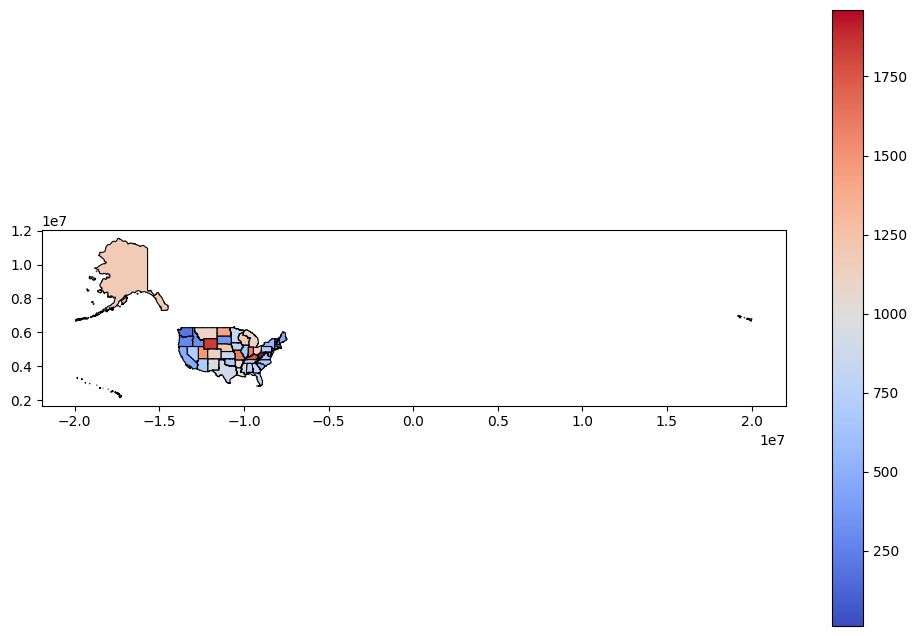

In [18]:
# Plot the merged geospatial data as-is
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
merged_dataframe_emissions.plot(
            column="CO2_rate",
            cmap="coolwarm",
            linewidth=0.8,
            ax=ax,
            edgecolor="black",
            legend=True,
        )

<Axes: >

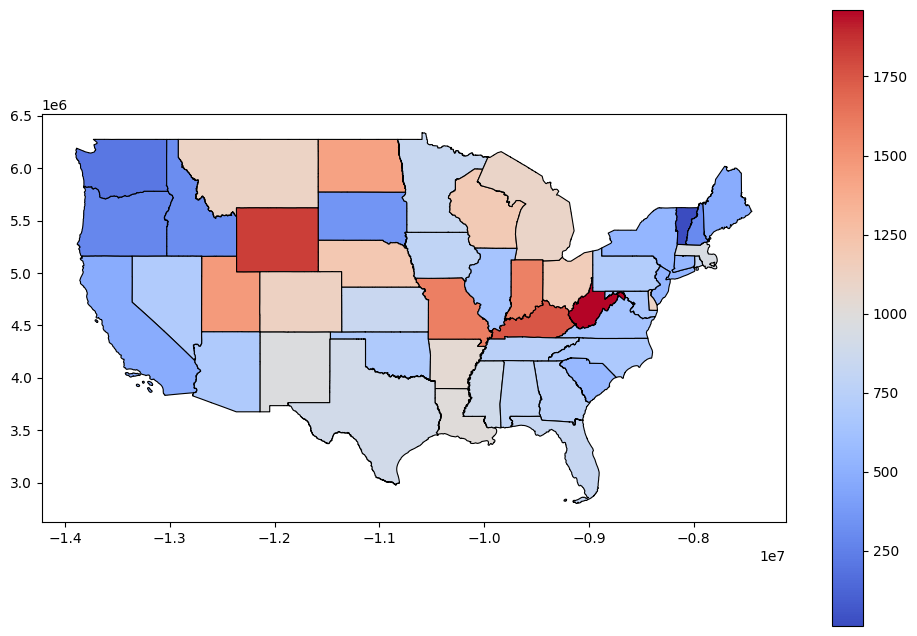

In [24]:
# Only plot continental US
not_alaska = merged_dataframe_emissions["STUSPS"] != "AK"
not_hawaii = merged_dataframe_emissions["STUSPS"] != "HI"
merged_dataframe_emissions_continental = merged_dataframe_emissions[not_alaska&not_hawaii]

fig, ax = plt.subplots(figsize=(12, 8))
merged_dataframe_emissions_continental.plot(
            column="CO2_rate",
            cmap="coolwarm",
            linewidth=0.8,
            ax=ax,
            edgecolor="black",
            legend=True,
        )

In [29]:
# Save the merged dataframe to GeoJSON format
merged_dataframe_emissions.to_file("output_geojson/eia_emissions_rates.geojson", driver='GeoJSON')